<a href="https://colab.research.google.com/github/ivansetya/Bikerentals-Dashboard/blob/main/Bike_sharing_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyek Analisis Data: Bike sharing dataset
* Nama: Ivan Setya Ananda
* Email: ivan.setya12@gmail.com
* Id Dicoding: ivan1215




## Menentukan Pertanyaan Bisnis

* Pada waktu apakah persewaan sepeda berada pada posisi signifikan secara jam, hari, minggu, dan bulan?
*   Apakah kondisi cuaca mempengaruhi persewaan sepeda?



## Menyiapkan semua library yang dibuthkan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Data Wrangling


###Gathering Data

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14



###Assesing Data

In [ ]:
print("duplicated: ", day_df.duplicated().sum())
day_df.info()

duplicated:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
print("duplicated: ", hour_df.duplicated().sum())
hour_df.info()

duplicated:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
current_data_types = day_df.dtypes
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
updated_data_types = day_df.dtypes

current_data_types, updated_data_types

(instant         int64
 dteday         object
 season          int64
 yr              int64
 mnth            int64
 holiday         int64
 weekday         int64
 workingday      int64
 weathersit      int64
 temp          float64
 atemp         float64
 hum           float64
 windspeed     float64
 casual          int64
 registered      int64
 cnt             int64
 dtype: object,
 instant                int64
 dteday        datetime64[ns]
 season                 int64
 yr                     int64
 mnth                   int64
 holiday                int64
 weekday                int64
 workingday             int64
 weathersit             int64
 temp                 float64
 atemp                float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    int64
 dtype: object)

In [ ]:
current_data_types = hour_df.dtypes
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
updated_data_types = hour_df.dtypes

current_data_types, updated_data_types

(instant         int64
 dteday         object
 season          int64
 yr              int64
 mnth            int64
 hr              int64
 holiday         int64
 weekday         int64
 workingday      int64
 weathersit      int64
 temp          float64
 atemp         float64
 hum           float64
 windspeed     float64
 casual          int64
 registered      int64
 cnt             int64
 dtype: object,
 instant                int64
 dteday        datetime64[ns]
 season                 int64
 yr                     int64
 mnth                   int64
 hr                     int64
 holiday                int64
 weekday                int64
 workingday             int64
 weathersit             int64
 temp                 float64
 atemp                float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    int64
 dtype: object)

###Cleaning Data

In [ ]:
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

##Explanatory Data Analysis (EDA)

In [ ]:
day_explore = day_df.copy(deep=True)
hour_explore = hour_df.copy(deep=True)

In [ ]:
day_explore.rename(columns={'yr':'year','mnth':'month','weekday':'week_day',
                   'workingday':'working_day','weathersit':'weather_situation','atemp':'temp_feel',
                   'hum':'humidity','windspeed':'wind_speed','cnt':'count'},inplace=True)
day_explore.head()

,instant,dteday,season,year,month,holiday,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
season_codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
day_explore['season'] = day_explore['season'].map(season_codes)
hour_explore['season'] = hour_explore['season'].map(season_codes)

In [ ]:
day_explore.season.value_counts()

fall      188
summer    184
spring    181
winter    178
Name: season, dtype: int64

In [ ]:
weathersit_codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
day_explore['weather_situation'] = day_explore['weather_situation'].map(weathersit_codes)

In [ ]:
day_explore.weather_situation.value_counts()

Clear         463
Mist          247
Light Snow     21
Name: weather_situation, dtype: int64

In [ ]:
working_codes = {1:'working_day',0:'holiday'}
day_explore['working_day'] = day_explore['working_day'].map(working_codes)

In [ ]:
working_codes = {1:'workingday',0:'holiday'}
hour_explore['workingday'] = hour_explore['workingday'].map(working_codes)

In [ ]:
day_explore['working_day'].value_counts()

working_day    500
holiday        231
Name: working_day, dtype: int64

In [ ]:
hour_explore['workingday'].value_counts()

workingday    11865
holiday        5514
Name: workingday, dtype: int64

In [ ]:
month_codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
day_explore['month'] = day_explore['month'].map(month_codes)

In [ ]:
day_explore['month'].value_counts()

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sep     60
Nov     60
Feb     57
Name: month, dtype: int64

In [ ]:
weekday_codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
day_explore['week_day'] = day_explore['week_day'].map(weekday_codes)

In [ ]:
day_explore['week_day'].value_counts()

Sun    105
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Name: week_day, dtype: int64

In [ ]:
yr_codes = {0:"2011",1:"2012"}
day_explore['year'] = day_explore['year'].map(yr_codes)

In [ ]:
hour_explore['yr'] = hour_explore['yr'].map(yr_codes)

In [ ]:
day_explore['year'].value_counts()

2012    366
2011    365
Name: year, dtype: int64

In [ ]:
hour_explore['yr'].value_counts()

2012    8734
2011    8645
Name: yr, dtype: int64

In [ ]:
day_explore.head(10)

,instant,dteday,season,year,month,holiday,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
0,1,2011-01-01,spring,2011,Jan,0,Sun,holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,Jan,0,Mon,holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,Jan,0,Tue,working_day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,Jan,0,Wed,working_day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,Jan,0,Thu,working_day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,spring,2011,Jan,0,Fri,working_day,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,spring,2011,Jan,0,Sat,working_day,Mist,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,spring,2011,Jan,0,Sun,holiday,Mist,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,spring,2011,Jan,0,Mon,holiday,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,spring,2011,Jan,0,Tue,working_day,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [ ]:
day_explore.head(10)

,instant,dteday,season,year,month,holiday,week_day,working_day,weather_situation,temp,temp_feel,humidity,wind_speed,casual,registered,count
0,1,2011-01-01,spring,2011,Jan,0,Sun,holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,Jan,0,Mon,holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,Jan,0,Tue,working_day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,Jan,0,Wed,working_day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,Jan,0,Thu,working_day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,spring,2011,Jan,0,Fri,working_day,Clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,spring,2011,Jan,0,Sat,working_day,Mist,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,spring,2011,Jan,0,Sun,holiday,Mist,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,spring,2011,Jan,0,Mon,holiday,Clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,spring,2011,Jan,0,Tue,working_day,Clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [ ]:
day_explore.groupby(by="week_day").instant.nunique().sort_values(ascending=False)

week_day
Mon    105
Sun    105
Tue    105
Fri    104
Sat    104
Thu    104
Wed    104
Name: instant, dtype: int64

##Visualization & Explanatory Analysis

###Pertanyaan 1: Pada waktu apakah persewaan sepeda berada pada posisi signifikan secara jam, hari, minggu, dan bulan?

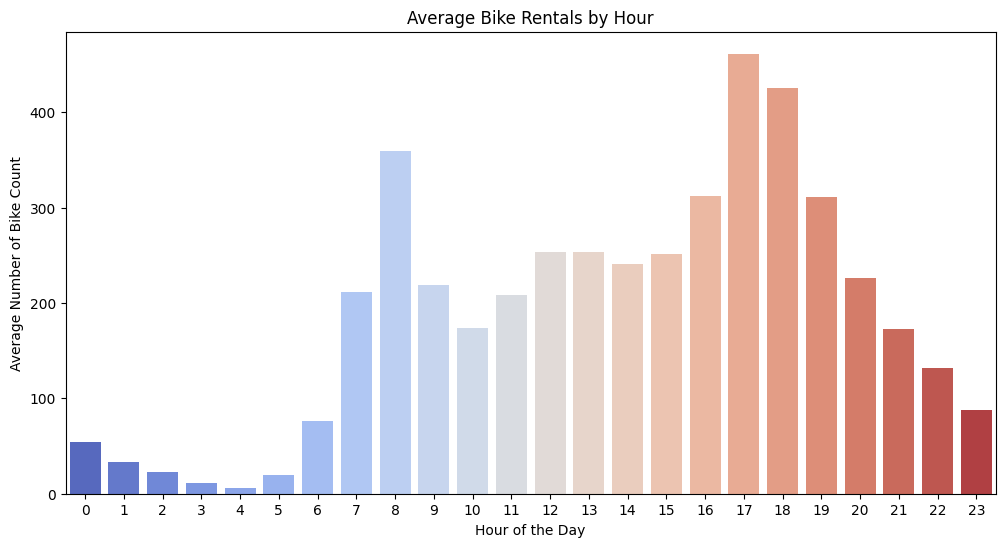

In [ ]:
hourly_rentals = hour_explore.groupby('hr')['cnt'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette='coolwarm')
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Bike Count')
plt.xticks(range(0, 24))

plt.show()

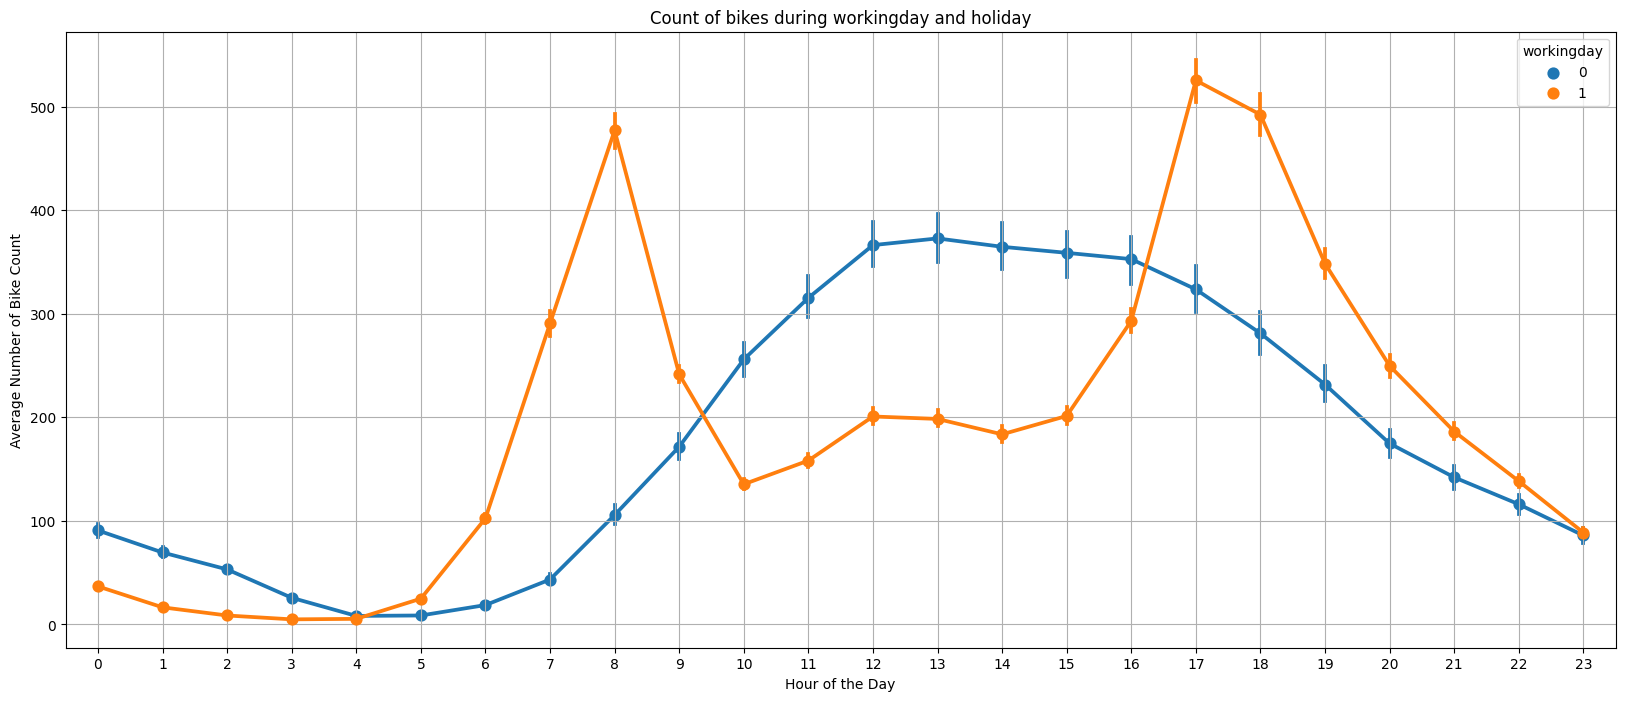

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.pointplot(data=hour_df, x='hr', y='cnt', hue='workingday', ax=ax)
ax.set(title='Count of bikes during workingday and holiday')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Number of Bike Count')
plt.grid(True)

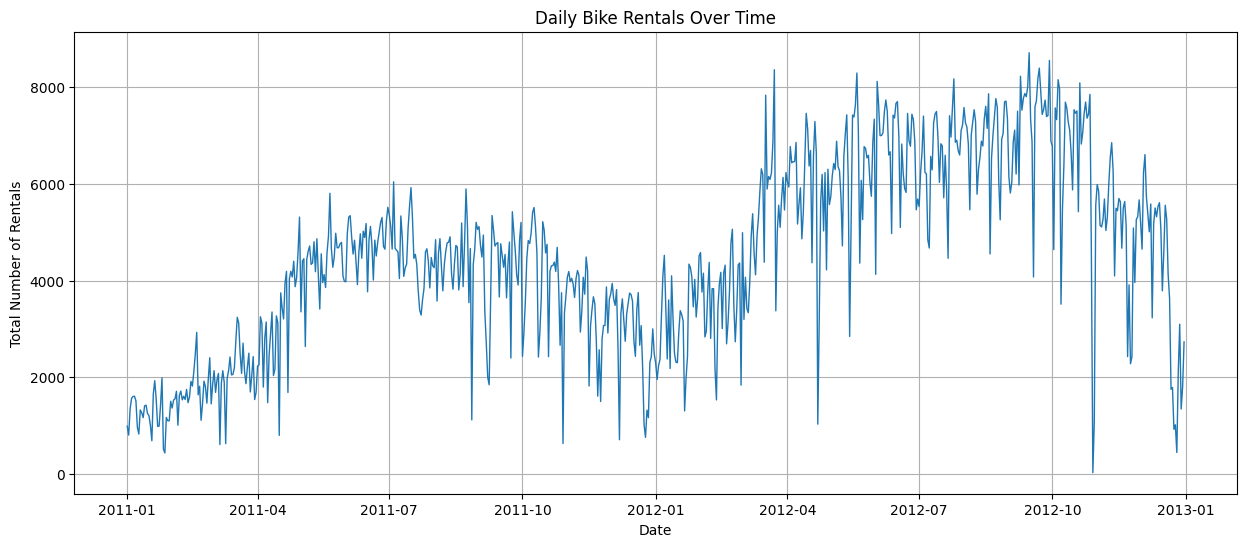

In [ ]:
day_explore['dteday'] = pd.to_datetime(day_explore['dteday'])

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(day_explore['dteday'], day_explore['count'], lw=1)
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Number of Rentals')
plt.grid(True)
plt.show()

In [ ]:
day_explore['week'] = day_explore['dteday'].dt.isocalendar().week
weekly_rentals = day_explore.groupby('week')['count'].sum().reset_index()

weekly_rentals.head(10)

,week,count
0,1,34008
1,2,29291
2,3,27112
3,4,33537
4,5,36676
5,6,33512
6,7,40371
7,8,38462
8,9,37934
9,10,44230


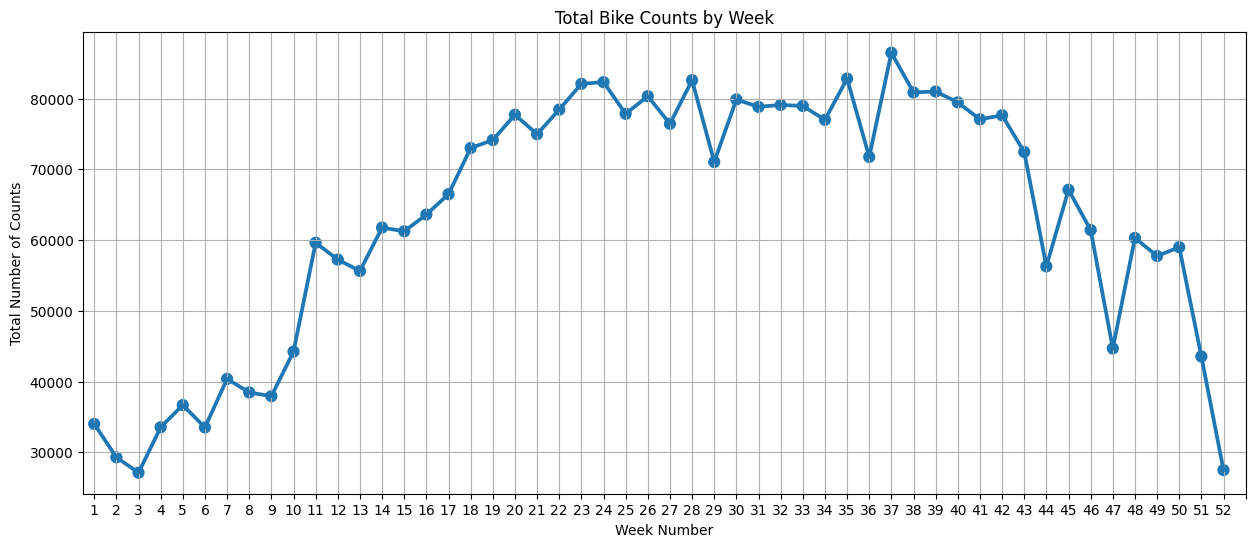

In [ ]:
# Plotting
plt.figure(figsize=(15, 6))
sns.pointplot(x='week', y='count', data=weekly_rentals)
plt.title('Total Bike Counts by Week')
plt.xlabel('Week Number')
plt.ylabel('Total Number of Counts')
plt.xticks(range(0, 53))
plt.grid(True)
plt.show()

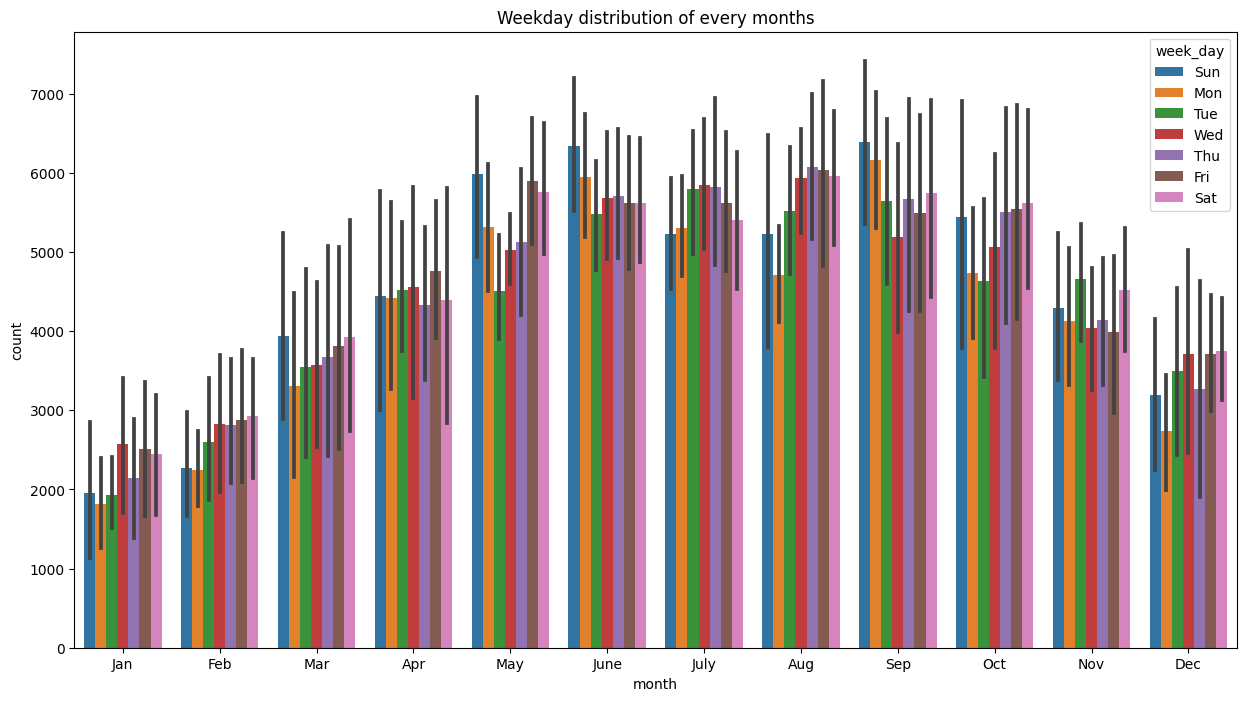

In [ ]:
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='count',data=day_explore[['month','count','week_day']],hue='week_day', ax=ax1)
ax1.set_title('Weekday distribution of every months')
plt.show()

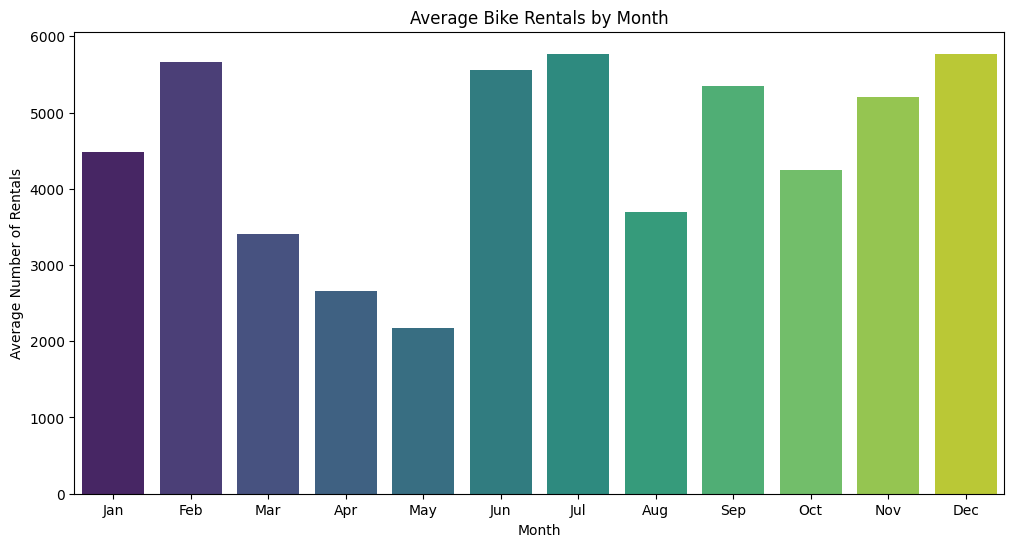

In [ ]:
monthly_rentals = day_explore.groupby('month')['count'].mean().reset_index()
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', data=monthly_rentals, palette='viridis')
plt.title('Average Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Number of Rentals')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

###Pertanyaan 2: Apakah kondisi cuaca mempengaruhi persewaan sepeda?

Correlation: 0.6274940090334918


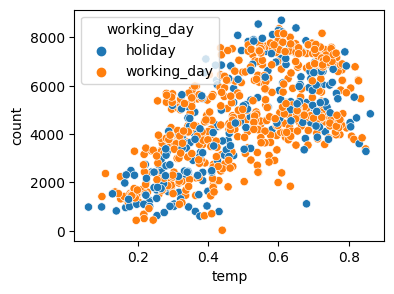

Correlation: 0.631065699849181


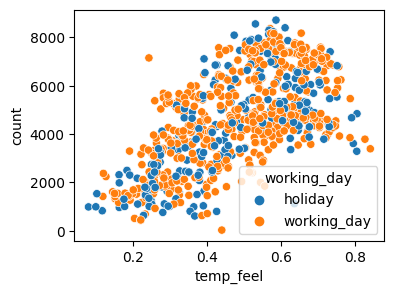

Correlation: -0.1006585621371552


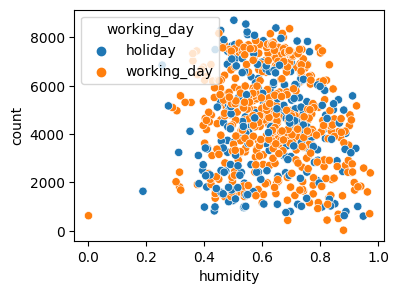

Correlation: -0.23454499742166993


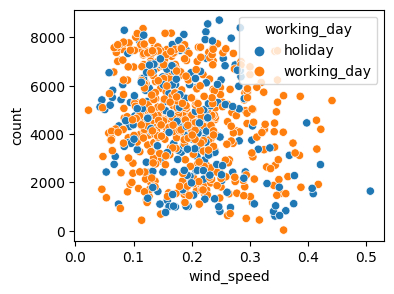

Correlation: 0.6728044333386833


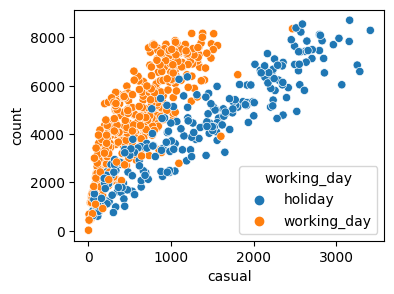

Correlation: 0.9455169158090357


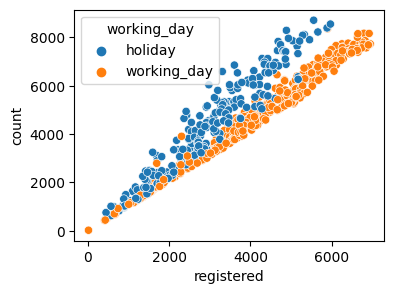

In [ ]:
weather_related_columns=['temp','temp_feel','humidity','wind_speed','casual','registered']
for col in weather_related_columns:
    plt.figure(figsize=(4,3))
    sns.scatterplot(data=day_explore,x=col,y='count',hue = day_explore['working_day'])
    correlation = day_explore[col].corr(day_explore['count'])
    print("Correlation:", correlation)
    plt.show()

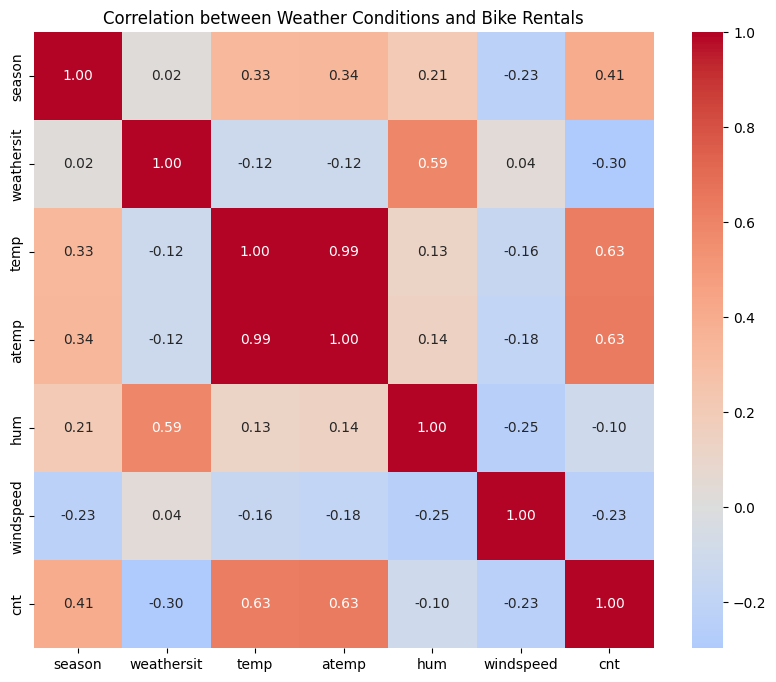

In [ ]:
weather_related_columns = ['season', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = day_df[weather_related_columns].corr()

# Visualization using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation between Weather Conditions and Bike Rentals')
plt.show()

##Conclusion

**Conclusion 1**

Dari visualisasi data jam, hari, minggu, dan bulan, dapat disimpulkan bahwa:

* Data per jam menunjukkan puncak yang jelas pada jam sibuk seperti rush hour di jam 6-8 dan jam 15-17 pada hari kerja,
menunjukkan tren jam yang signifikan.

* Data harian dan mingguan mengungkapkan pola yang mungkin dipengaruhi oleh minggu kerja dan akhir pekan.

* Data bulanan menunjukkan tren musiman, dengan jumlah penyewaan yang lebih tinggi selama bulan-bulan yang lebih hangat dan lebih rendah selama bulan-bulan yang lebih dingin.

---

Untuk menentukan kerangka waktu yang paling signifikan untuk menganalisis pola penyewaan, akan penting untuk mempertimbangkan kebutuhan sistem peminjaman sepeda. Jika sistem perlu mengelola operasi pada sehari-hari dan pada jam sibuk, data per jam sangat penting. Untuk keputusan strategis, seperti pemeliharaan dan pengelolaan sepeda musiman, pola bulanan dan mingguan mungkin lebih relevan.

**Conclusion 2**

Dari tabel scatter dan tabel heatmap, terdapat beberapa observasi terkait erat antara kondisi cuaca dengan penyewaan sepeda, sebagai berikut:

* Temperature (temp dan atemp) memiliki strong positive correlation dengan bike rentals(cnt), menandakan bahwa semakin tinggi temparature maka sejajar lebih banyak penyewaan sepeda.

* Humidity (hum) memiliki negative correlation dengan bike rentals(cnt), menandakan bahwa semakin tinggi humidity dan kondisi cuaca yang buruk (semakin tinggi wathersit menandakan kondisi cuaca yang buruk 1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain') maka lebih sedikit penyewaan sepeda.

* Wind speed (windspeed) memiliki negative correlation dengan bike rentals (cnt).

* Season (season) memiliki positive correlation, menandakan musim berpengaruh pada penyewaan sepeda yang berhubungan dengan pola bulanan pada kesimpulan pertama.


---


Visualisasi ini secara efektif menggambarkan faktor cuaca dan musim mana yang paling terkait erat dengan permintaan persewaan sepeda.​

In [ ]:
day_explore.to_csv("path_to_day.csv", index=False)
hour_explore.to_csv("path_to_hour.csv", index=False)